In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

In [2]:
os.chdir("C:/Demo spy/Decision tree/")

In [3]:
"""
Data Engineering and Analysis
"""
#Load the dataset

AH_data = pd.read_csv("tree_addhealth.csv")

In [4]:
AH_data.head()

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,age,TREG1,ALCEVR1,ALCPROBS1,...,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
0,2.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,1.0,2,...,47.0,4.0,0,5.0,NaN,NaN,0.0,24.3,8.0,15.0
1,2.0,0.0,0.0,1.0,0.0,0.0,19.427397,1.0,1.0,1,...,35.0,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0
2,1.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0,...,45.0,0.0,0,1.0,30.0,2.250000,0.0,24.3,3.0,15.0
3,1.0,0.0,0.0,1.0,0.0,0.0,20.430137,1.0,0.0,0,...,47.0,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0
4,2.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,1.0,0,...,39.0,0.0,0,5.0,32.0,3.000000,0.0,20.0,9.0,6.0


In [5]:
data_clean = AH_data.dropna()

In [6]:
data_clean.dtypes

BIO_SEX      float64
HISPANIC     float64
WHITE        float64
BLACK        float64
NAMERICAN    float64
ASIAN        float64
age          float64
TREG1        float64
ALCEVR1      float64
ALCPROBS1      int64
marever1       int64
cocever1       int64
inhever1       int64
cigavail     float64
DEP1         float64
ESTEEM1      float64
VIOL1        float64
PASSIST        int64
DEVIANT1     float64
SCHCONN1     float64
GPA1         float64
EXPEL1       float64
FAMCONCT     float64
PARACTV      float64
PARPRES      float64
dtype: object

In [7]:
data_clean.describe()

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,age,TREG1,ALCEVR1,ALCPROBS1,...,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
count,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,...,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000
mean,1.521093,0.111038,0.683279,0.236066,0.036284,0.040437,16.493052,0.176393,0.527432,0.369180,...,40.952131,1.618579,0.102514,2.645027,28.360656,2.815647,0.040219,22.570557,6.290710,13.398033
std,0.499609,0.314214,0.465249,0.424709,0.187017,0.197004,1.552174,0.381196,0.499302,0.894947,...,5.381439,2.593230,0.303356,3.520554,5.156385,0.770167,0.196493,2.614754,3.360219,2.085837
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.676712,0.000000,0.000000,0.000000,...,18.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,6.300000,0.000000,3.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.254795,0.000000,0.000000,0.000000,...,38.000000,0.000000,0.000000,0.000000,25.000000,2.250000,0.000000,21.700000,4.000000,12.000000
50%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,16.509589,0.000000,1.000000,0.000000,...,40.000000,0.000000,0.000000,1.000000,29.000000,2.750000,0.000000,23.700000,6.000000,14.000000
75%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.679452,0.000000,1.000000,0.000000,...,45.000000,2.000000,0.000000,4.000000,32.000000,3.500000,0.000000,24.300000,9.000000,15.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.512329,1.000000,1.000000,6.000000,...,50.000000,19.000000,1.000000,27.000000,38.000000,4.000000,1.000000,25.000000,18.000000,15.000000


In [8]:
"""
Modeling and Prediction
"""
#Split into training and testing sets

""" ORIGINAL DATA.... 
predictors = data_clean[['BIO_SEX','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN',
'age','ALCEVR1','ALCPROBS1','marever1','cocever1','inhever1','cigavail','DEP1',
'ESTEEM1','VIOL1','PASSIST','DEVIANT1','SCHCONN1','GPA1','EXPEL1','FAMCONCT','PARACTV',
'PARPRES']]
"""

# predictors = data_clean[['BIO_SEX','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN']]


predictors = data_clean[['DEVIANT1','HISPANIC','WHITE','BLACK']]

In [9]:
targets = data_clean.TREG1

pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.4)

In [10]:
pred_train.shape

(2745, 4)

In [11]:
pred_test.shape

(1830, 4)

In [12]:
tar_train.shape

(2745,)

In [13]:
tar_test.shape

(1830,)

In [14]:
#Build model on training data
classifier=DecisionTreeClassifier(max_depth=3)

In [15]:
classifier=classifier.fit(pred_train,tar_train)

In [16]:
predictions=classifier.predict(pred_test)

In [17]:
""" Confusion Matrix """
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[1502,    1],
       [ 326,    1]], dtype=int64)

In [18]:
""" Accuracy Score """
sklearn.metrics.accuracy_score(tar_test, predictions)

0.8213114754098361

In [19]:
#Displaying the decision tree
from sklearn import tree

In [20]:
#from StringIO import StringIO
# from io import StringIO 
#from io import BytesIO
# if error limit, setting => notebook.output.textLineLimit
from io import StringIO
from IPython.display import Image
out = StringIO()
#out = BytesIO()

In [21]:
#pip install graphviz

In [22]:
#tree.export_graphviz(classifier, out_file=out, class_names='class', filled=True, rounded=True, special_characters=True)

dot_data = tree.export_graphviz(classifier, out_file=None, class_names='class', filled=True, rounded=True, special_characters=True)

In [23]:
#pip install pydotplus

In [25]:
import pydotplus
import graphviz
# download to install Graphviz path : https://www.graphviz.org/download/

In [26]:

from IPython.display import Image  
from sklearn.tree import export_graphviz
import os
#os.environ["PATH"] += os.pathsep + 'C:/Users/tstusr/AppData/Local/Continuum/anaconda3/pkgs/Graphviz2.38/bin'

In [27]:
#import sys
#sys.path.append('C:/Users/usrname/AppData/Local/Continuum/anaconda3/Library/bin/graphviz/')

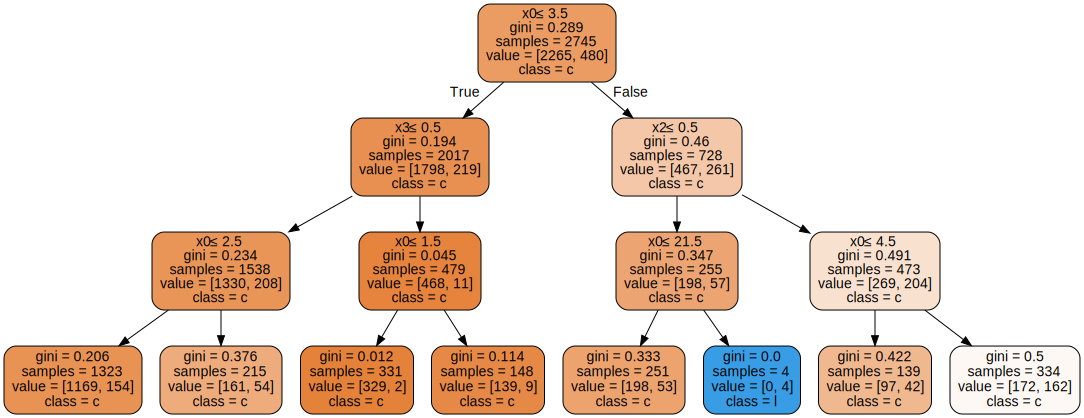

In [28]:
#graph=pydotplus.graph_from_dot_data(out.getvalue())

#graph.write_png("iris.png")
#Image(graph.)
#from graphviz import Source
#graph = graphviz.Source(out)
#Image(graph.render())
#graph.render('tree',format='.png', view=False)
#graph = pydotplus.graph_from_dot_data(dot_data)
graph = graphviz.Source(dot_data)
graph 


In [29]:
print(type(dot_data))
print(dot_data)

<class 'str'>
digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<x<SUB>0</SUB> &le; 3.5<br/>gini = 0.289<br/>samples = 2745<br/>value = [2265, 480]<br/>class = c>, fillcolor="#eb9c63"] ;
1 [label=<x<SUB>3</SUB> &le; 0.5<br/>gini = 0.194<br/>samples = 2017<br/>value = [1798, 219]<br/>class = c>, fillcolor="#e89051"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<x<SUB>0</SUB> &le; 2.5<br/>gini = 0.234<br/>samples = 1538<br/>value = [1330, 208]<br/>class = c>, fillcolor="#e99558"] ;
1 -> 2 ;
3 [label=<gini = 0.206<br/>samples = 1323<br/>value = [1169, 154]<br/>class = c>, fillcolor="#e89253"] ;
2 -> 3 ;
4 [label=<gini = 0.376<br/>samples = 215<br/>value = [161, 54]<br/>class = c>, fillcolor="#eeab7b"] ;
2 -> 4 ;
5 [label=<x<SUB>0</SUB> &le; 1.5<br/>gini = 0.045<br/>samples = 479<br/>value = [468, 11]<br/>class = c>, fillcolor="#e6843e"] ;
1 -> 5 ;
6 [label=<gini = 0.012<br/>sam